In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv('google_stock_data.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3563 non-null   object 
 1   Open       3563 non-null   float64
 2   High       3563 non-null   float64
 3   Low        3563 non-null   float64
 4   Close      3563 non-null   float64
 5   Adj Close  3563 non-null   float64
 6   Volume     3563 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 195.0+ KB


In [ ]:
# Use only the 'Close' column for prediction
df = df['Close'].values

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df.reshape(-1, 1))

In [ ]:
# Create sequences of 60 consecutive stock prices as features and the 61st price as the label
X = []
y = []
for i in range(60, len(df)):
    X.append(df[i-60:i, 0])
    y.append(df[i, 0])
X, y = np.array(X), np.array(y)

In [ ]:
# Reshape X to be of shape (samples, time steps, features) which is required for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

In [ ]:
# Train the model
model.fit(X,y,epochs=10,batch_size=30,validation_split=0.05)

Epoch 1/10
111/111 [==============================] - 11s 62ms/step - loss: 0.0229 - val_loss: 0.0182
Epoch 2/10
111/111 [==============================] - 8s 72ms/step - loss: 0.0100 - val_loss: 0.0056
Epoch 3/10
111/111 [==============================] - 6s 58ms/step - loss: 0.0063 - val_loss: 0.0125
Epoch 4/10
111/111 [==============================] - 11s 103ms/step - loss: 0.0047 - val_loss: 7.8611e-04
Epoch 5/10
111/111 [==============================] - 11s 99ms/step - loss: 0.0036 - val_loss: 0.0028
Epoch 6/10
111/111 [==============================] - 9s 81ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 7/10
111/111 [==============================] - 7s 59ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/10
111/111 [==============================] - 8s 72ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 9/10
111/111 [==============================] - 7s 59ms/step - loss: 0.0019 - val_loss: 7.6250e-04
Epoch 10/10
111/111 [==============================] - 8s 72ms/step - loss: 0.0

110/110 [==============================] - 3s 22ms/step


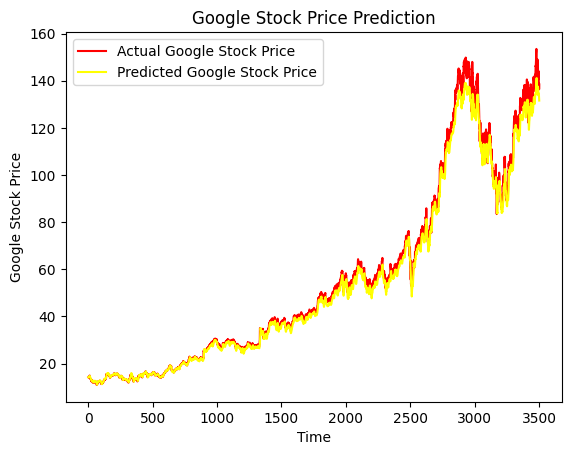

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Undo scaling

# Get the actual prices (also undo scaling)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.plot(actual_prices, color='red', label='Actual Google Stock Price')
plt.plot(predicted_prices, color='yellow', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(actual_prices, predicted_prices)

# print the R-squared value as a percentage
print("R-squared: {:.2f}%".format(r2 * 100))

R-squared: 99.29%


In [ ]:
r2

0.9929389069552066